## Linear Regression

2018-04-25：更新为新版本代码

In [1]:
import torch
from torch import nn, optim
import numpy as np
import matplotlib.pyplot as plt

数据初始化

In [2]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], [9.779], [6.182], [7.59], [2.167],
                    [7.042], [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)
y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], [3.366], [2.596], [2.53], [1.221],
                    [2.827], [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)

定义线性回归模型的模型类的框架，其中只需一个一维的线性函数

In [3]:
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1, 1) # input and output is 1 dimension
    
    def forward(self, x):
        out = self.linear(x)
        return out

实例化模型类

In [4]:
model = LinearRegression()

定义 loss 为最小二乘损失函数以及优化器为随机梯度下降

In [5]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-3)

开始训练

**注意**：pytorch 0.4.0 版本已经支持零维 Tensor 向量，即 loss 在新版本可以直接调用，而在旧版本需要按 loss[0] 调用

In [6]:
num_epoches = 400
for epoch in range(num_epoches):
    inputs = x_train
    target = y_train
    
    # forward
    out = model(inputs)
    loss = criterion(out, target)
    # backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 20 == 0:
        print(f'Epoch[{epoch+1}/{num_epoches}], loss: {loss:.6f}')

Epoch[20/400], loss: 0.906909
Epoch[40/400], loss: 0.354360
Epoch[60/400], loss: 0.337784
Epoch[80/400], loss: 0.335663
Epoch[100/400], loss: 0.333948
Epoch[120/400], loss: 0.332261
Epoch[140/400], loss: 0.330591
Epoch[160/400], loss: 0.328938
Epoch[180/400], loss: 0.327303
Epoch[200/400], loss: 0.325684
Epoch[220/400], loss: 0.324081
Epoch[240/400], loss: 0.322495
Epoch[260/400], loss: 0.320926
Epoch[280/400], loss: 0.319372
Epoch[300/400], loss: 0.317834
Epoch[320/400], loss: 0.316312
Epoch[340/400], loss: 0.314805
Epoch[360/400], loss: 0.313314
Epoch[380/400], loss: 0.311838
Epoch[400/400], loss: 0.310377


In [7]:
model.eval()

LinearRegression(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

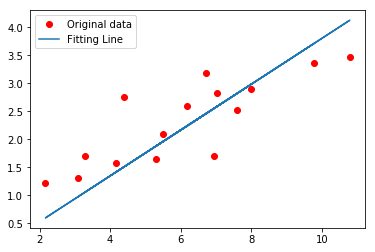

In [8]:
%matplotlib inline
predict = model(x_train)
predict = predict.detach().numpy()
plt.plot(x_train.numpy(), y_train.numpy(), 'ro', label='Original data')
plt.plot(x_train.numpy(), predict, label='Fitting Line')
plt.legend()

In [9]:
torch.save(model.state_dict(), 'save/01-linear regression.pytorch')